In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos 
file_path = r'C:\Users\Nicolas\Desktop\Proyecto Analitica Compu\Proyecto parte 2\Bank.csv'
df = pd.read_csv(file_path)

# info datos
print(df.head())
print(df.info())


   age           job  marital  education  balance  housing  loan  contact  \
0   58    management  married   tertiary     2143        1     0  unknown   
1   44    technician   single  secondary       29        1     0  unknown   
2   33  entrepreneur  married  secondary        2        1     1  unknown   
3   47   blue-collar  married    unknown     1506        1     0  unknown   
4   33       unknown   single    unknown        1        0     0  unknown   

   day month  duration  campaign  pdays poutcome  y  
0    5   may       261         1     -1  unknown  0  
1    5   may       151         1     -1  unknown  0  
2    5   may        76         1     -1  unknown  0  
3    5   may        92         1     -1  unknown  0  
4    5   may       198         1     -1  unknown  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-

In [43]:
# Identificación de duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

# Manejo de duplicados
if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Filas duplicadas eliminadas. Número de filas restantes: {df.shape[0]}")



Número de filas duplicadas: 0


In [44]:
# Identificación de valores faltantes
valores_faltantes = df.isnull().sum()
print("\nValores faltantes en cada columna:")
print(valores_faltantes[valores_faltantes > 0])  # Muestra solo las columnas con valores faltantes



Valores faltantes en cada columna:
Series([], dtype: int64)


In [27]:
# variables numericas y categoricas
numeric_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'y']
categorical_vars = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']


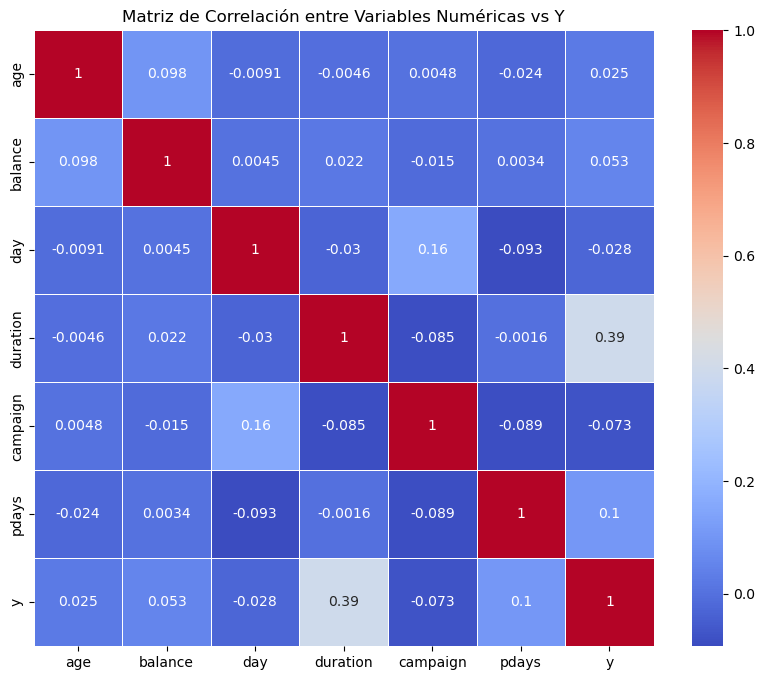

In [29]:
# Matriz de correlación entre variables numéricas
correlation_matrix = df[numeric_vars].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas vs Y')
plt.show()


Vemos una correlación moderada de 0.39 entre la variable de interes (y) y "Duration", el resto de las variables tienen una correlación cercana a 0 contra la variable de interes.

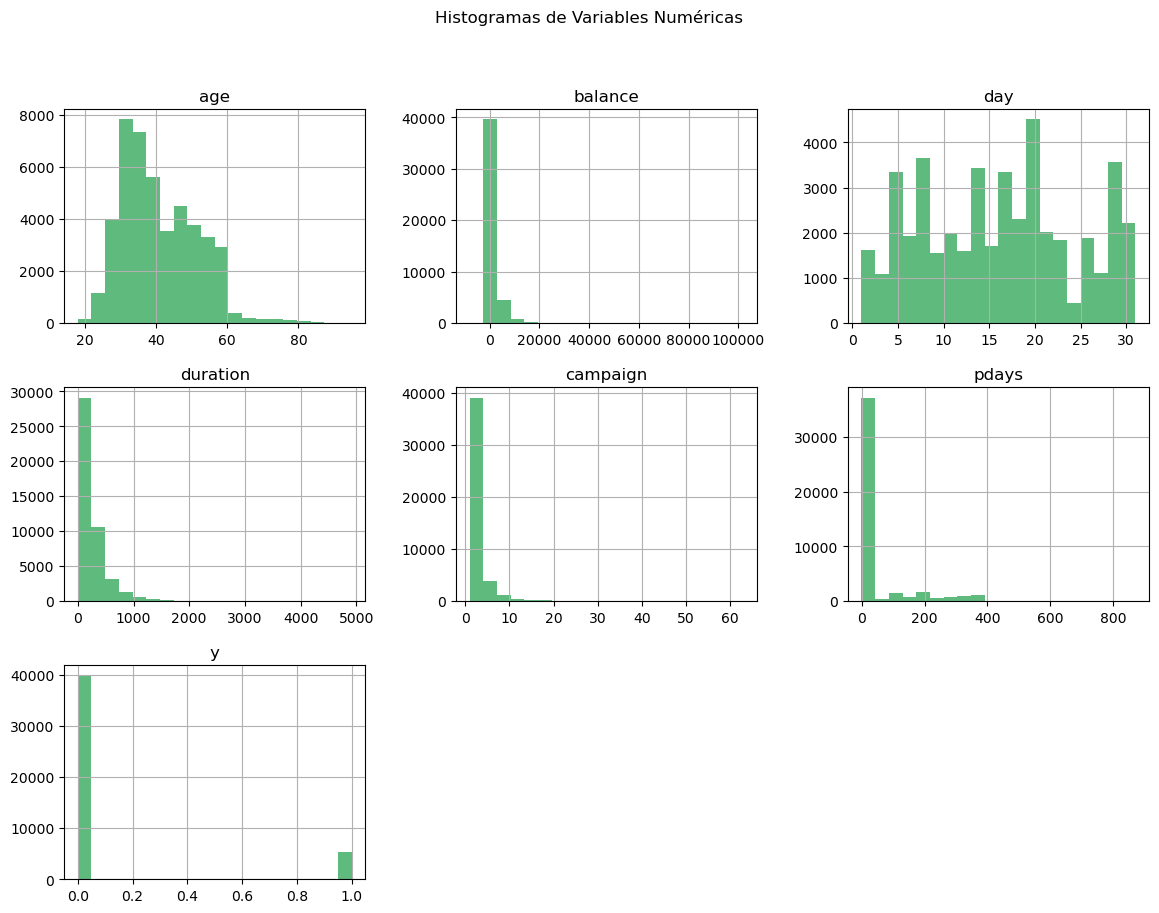

In [30]:
# Histogramas variables numéricas
df[numeric_vars].hist(bins=20, figsize=(14, 10), color='#5fba7d')
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()


Vemos que la variable "age" se concentra entre los 20 y 60 años de edad. "Duration" pareceria distribuirse de forma exponencial. 

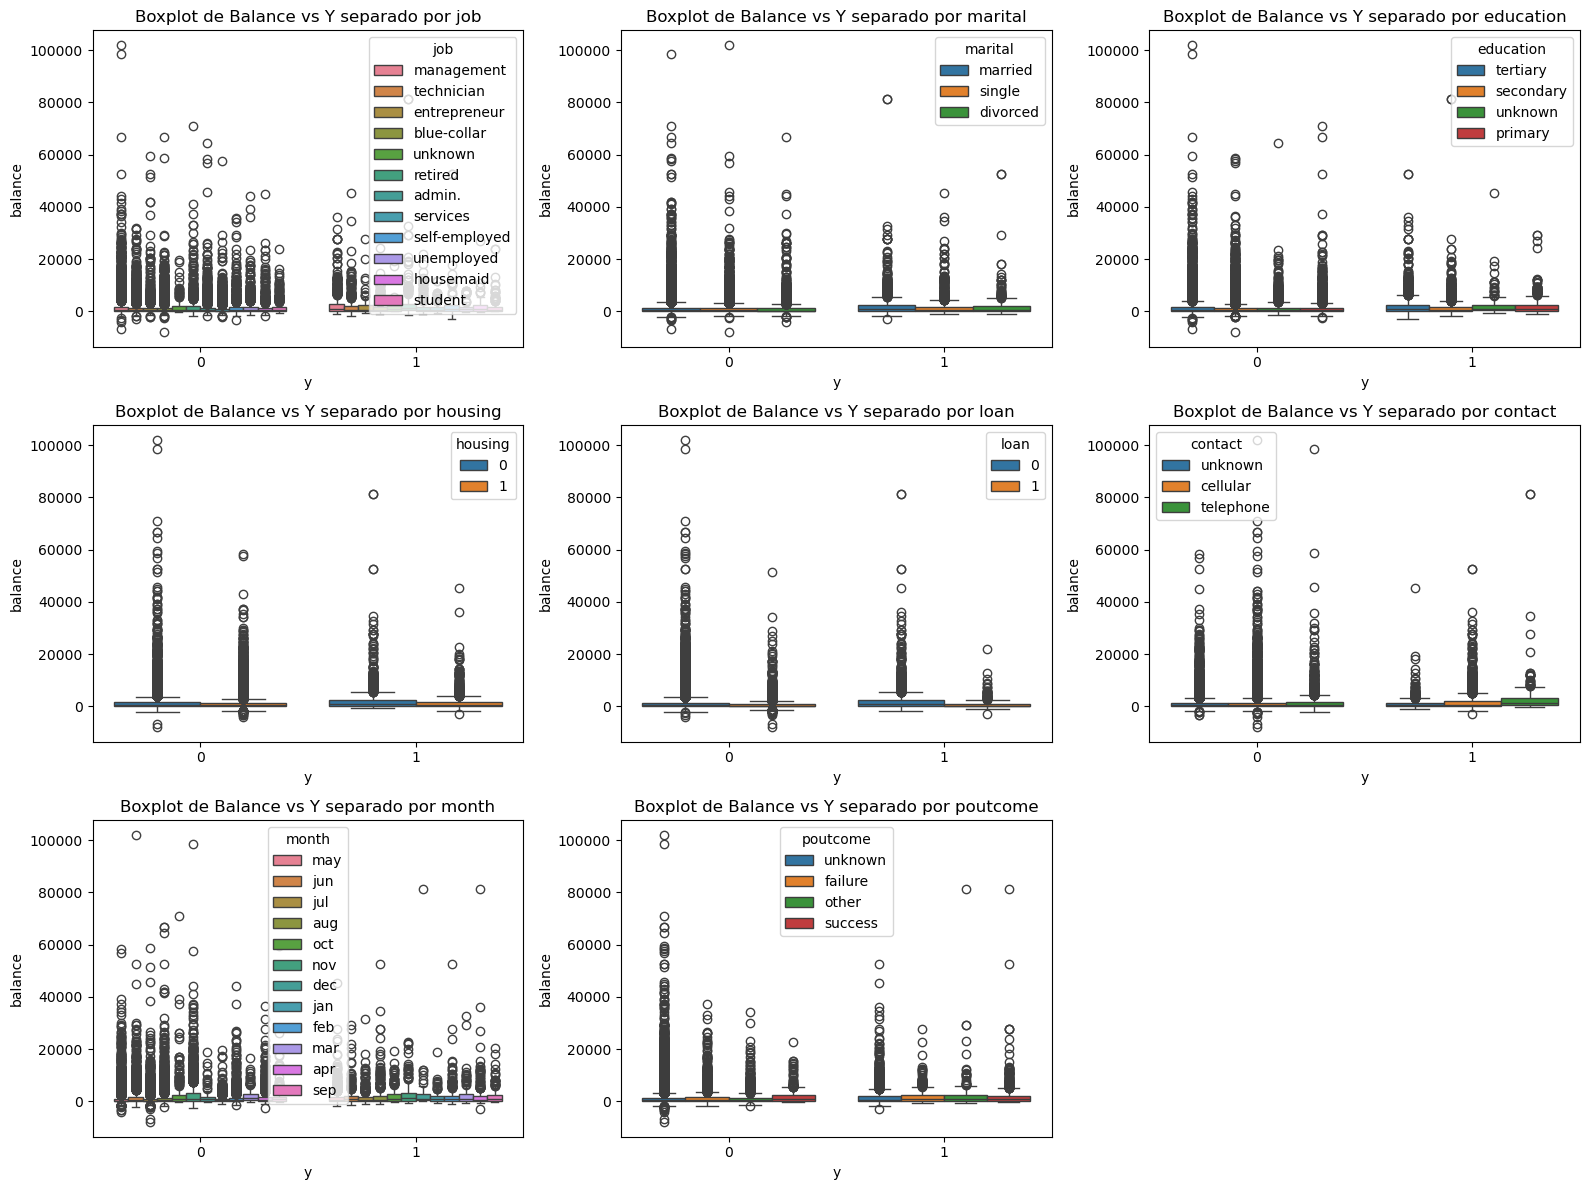

In [31]:
# Boxplots para las variables categoricas vs variable objetivo (y)
plt.figure(figsize=(16, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='y', y='balance', hue=var, data=df)
    plt.title(f'Boxplot de Balance vs Y separado por {var}')

plt.tight_layout()
plt.show()


No se ve ningun comportamiento extraño.

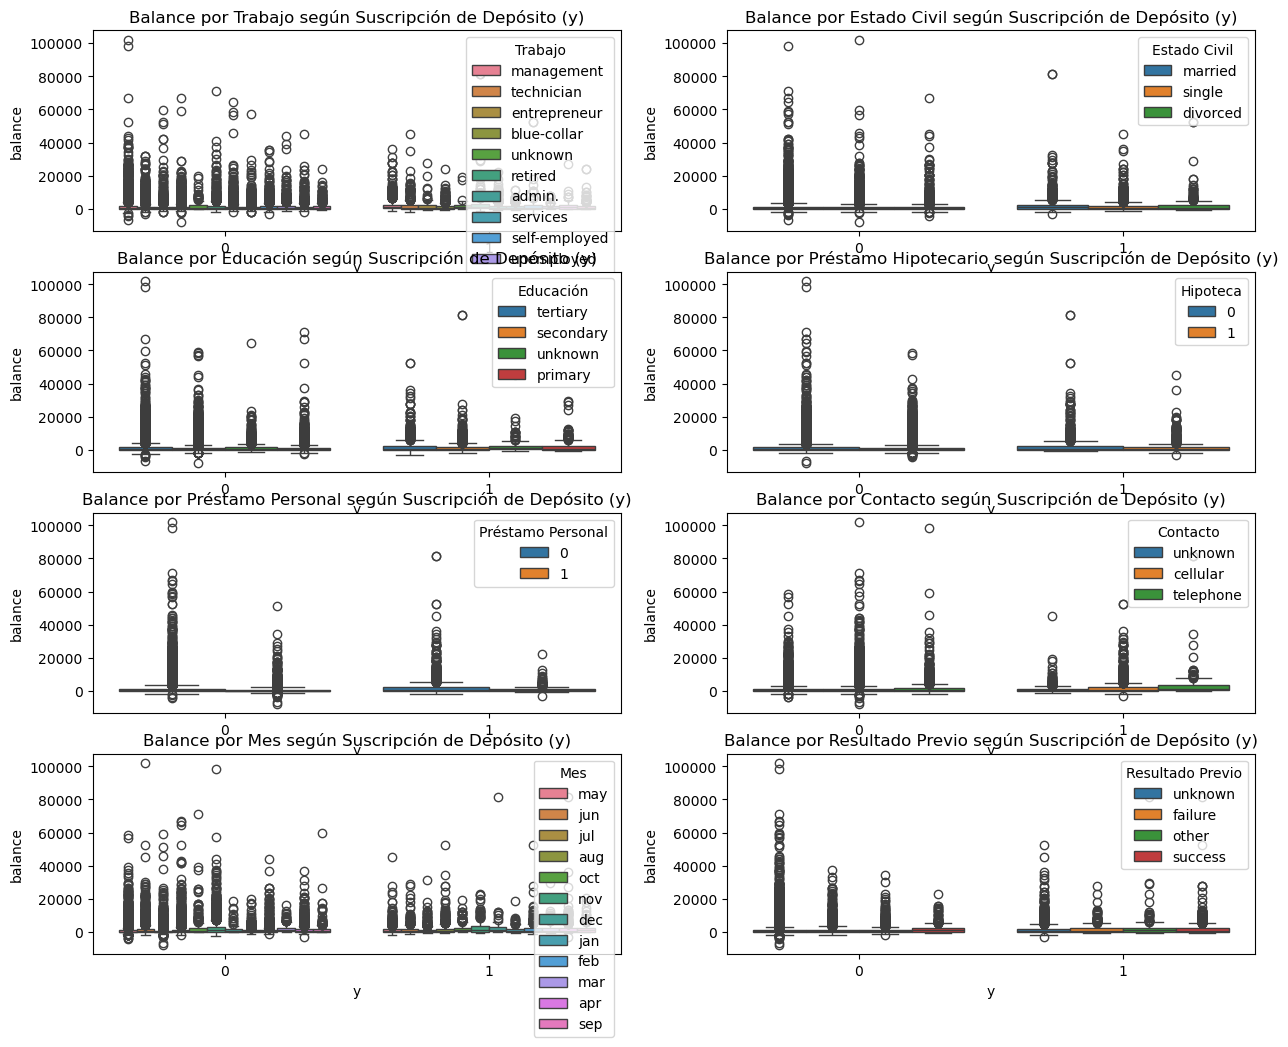

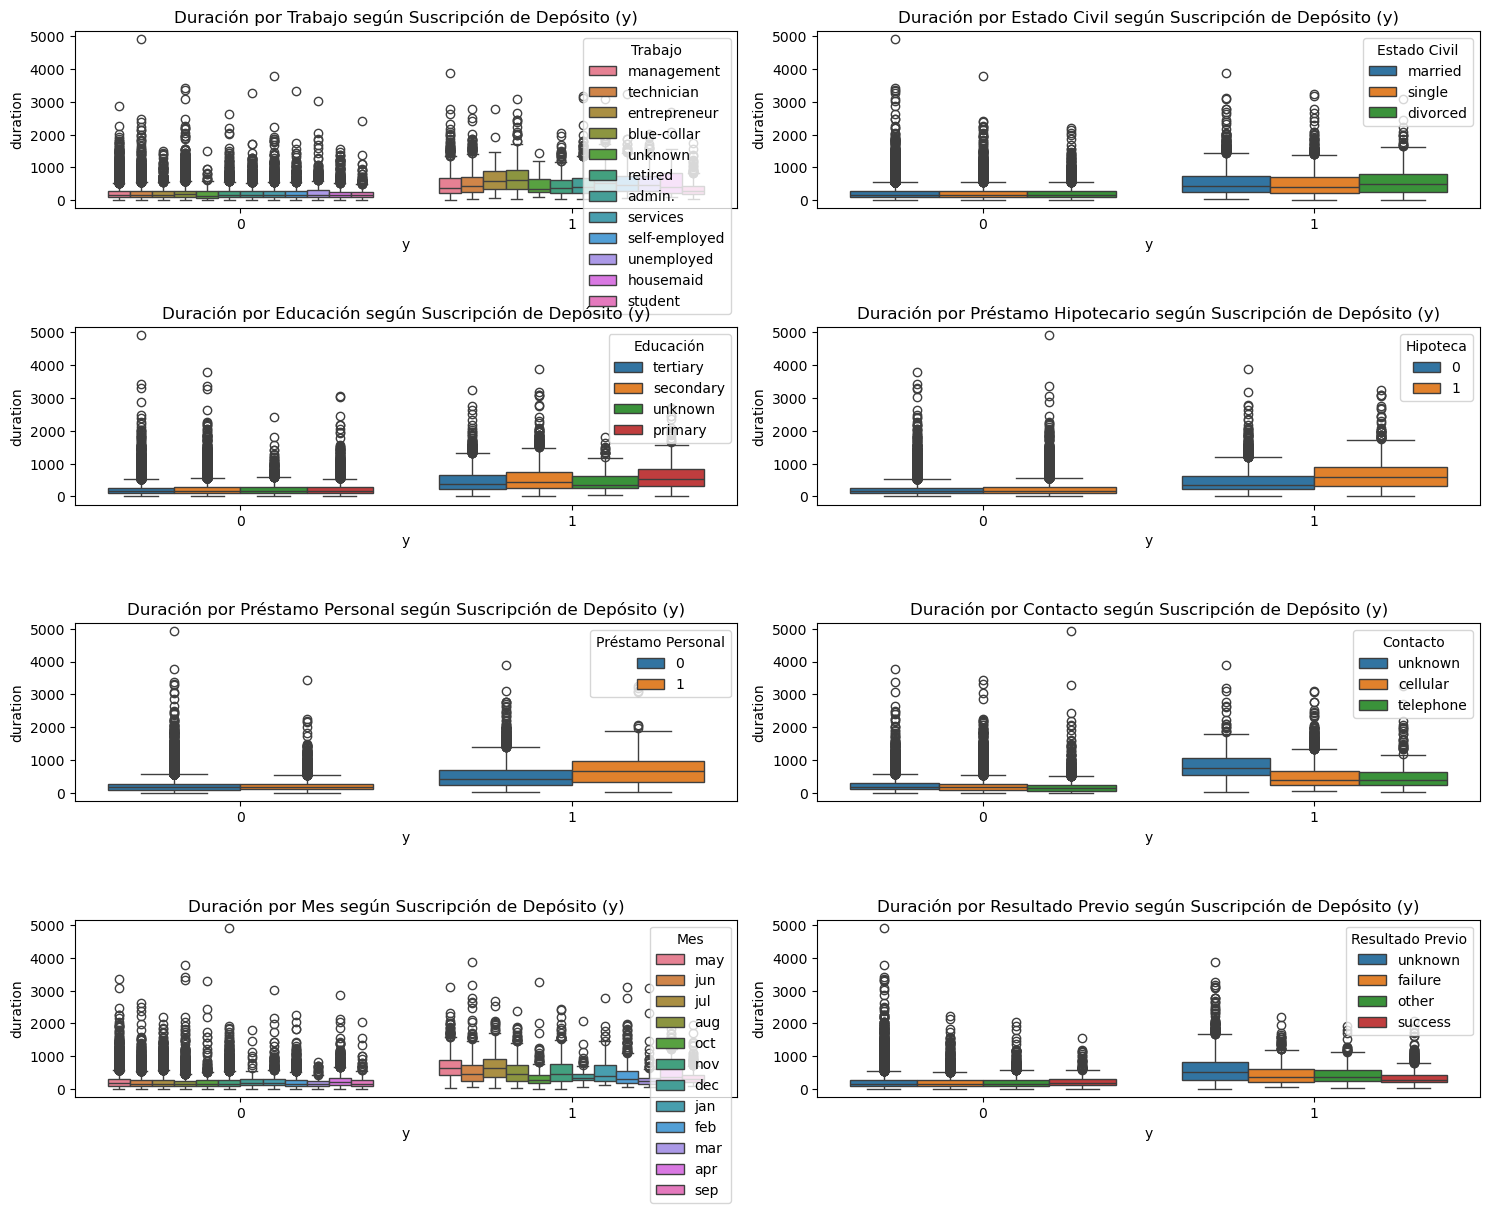

In [41]:
# Configuración para los gráficos
plt.figure(figsize=(15, 12))

# Boxplot para 'balance' con cada variable categórica
plt.subplot(4, 2, 1)
sns.boxplot(x='y', y='balance', hue='job', data=df)
plt.title('Balance por Trabajo según Suscripción de Depósito (y)')
plt.legend(title='Trabajo', loc='upper right')

plt.subplot(4, 2, 2)
sns.boxplot(x='y', y='balance', hue='marital', data=df)
plt.title('Balance por Estado Civil según Suscripción de Depósito (y)')
plt.legend(title='Estado Civil', loc='upper right')

plt.subplot(4, 2, 3)
sns.boxplot(x='y', y='balance', hue='education', data=df)
plt.title('Balance por Educación según Suscripción de Depósito (y)')
plt.legend(title='Educación', loc='upper right')

plt.subplot(4, 2, 4)
sns.boxplot(x='y', y='balance', hue='housing', data=df)
plt.title('Balance por Préstamo Hipotecario según Suscripción de Depósito (y)')
plt.legend(title='Hipoteca', loc='upper right')

plt.subplot(4, 2, 5)
sns.boxplot(x='y', y='balance', hue='loan', data=df)
plt.title('Balance por Préstamo Personal según Suscripción de Depósito (y)')
plt.legend(title='Préstamo Personal', loc='upper right')

plt.subplot(4, 2, 6)
sns.boxplot(x='y', y='balance', hue='contact', data=df)
plt.title('Balance por Contacto según Suscripción de Depósito (y)')
plt.legend(title='Contacto', loc='upper right')

plt.subplot(4, 2, 7)
sns.boxplot(x='y', y='balance', hue='month', data=df)
plt.title('Balance por Mes según Suscripción de Depósito (y)')
plt.legend(title='Mes', loc='upper right')

plt.subplot(4, 2, 8)
sns.boxplot(x='y', y='balance', hue='poutcome', data=df)
plt.title('Balance por Resultado Previo según Suscripción de Depósito (y)')
plt.legend(title='Resultado Previo', loc='upper right')

# Boxplots para 'duration'
plt.figure(figsize=(15, 12))

plt.subplot(4, 2, 1)
sns.boxplot(x='y', y='duration', hue='job', data=df)
plt.title('Duración por Trabajo según Suscripción de Depósito (y)')
plt.legend(title='Trabajo', loc='upper right')

plt.subplot(4, 2, 2)
sns.boxplot(x='y', y='duration', hue='marital', data=df)
plt.title('Duración por Estado Civil según Suscripción de Depósito (y)')
plt.legend(title='Estado Civil', loc='upper right')

plt.subplot(4, 2, 3)
sns.boxplot(x='y', y='duration', hue='education', data=df)
plt.title('Duración por Educación según Suscripción de Depósito (y)')
plt.legend(title='Educación', loc='upper right')

plt.subplot(4, 2, 4)
sns.boxplot(x='y', y='duration', hue='housing', data=df)
plt.title('Duración por Préstamo Hipotecario según Suscripción de Depósito (y)')
plt.legend(title='Hipoteca', loc='upper right')

plt.subplot(4, 2, 5)
sns.boxplot(x='y', y='duration', hue='loan', data=df)
plt.title('Duración por Préstamo Personal según Suscripción de Depósito (y)')
plt.legend(title='Préstamo Personal', loc='upper right')

plt.subplot(4, 2, 6)
sns.boxplot(x='y', y='duration', hue='contact', data=df)
plt.title('Duración por Contacto según Suscripción de Depósito (y)')
plt.legend(title='Contacto', loc='upper right')

plt.subplot(4, 2, 7)
sns.boxplot(x='y', y='duration', hue='month', data=df)
plt.title('Duración por Mes según Suscripción de Depósito (y)')
plt.legend(title='Mes', loc='upper right')

plt.subplot(4, 2, 8)
sns.boxplot(x='y', y='duration', hue='poutcome', data=df)
plt.title('Duración por Resultado Previo según Suscripción de Depósito (y)')
plt.legend(title='Resultado Previo', loc='upper right')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


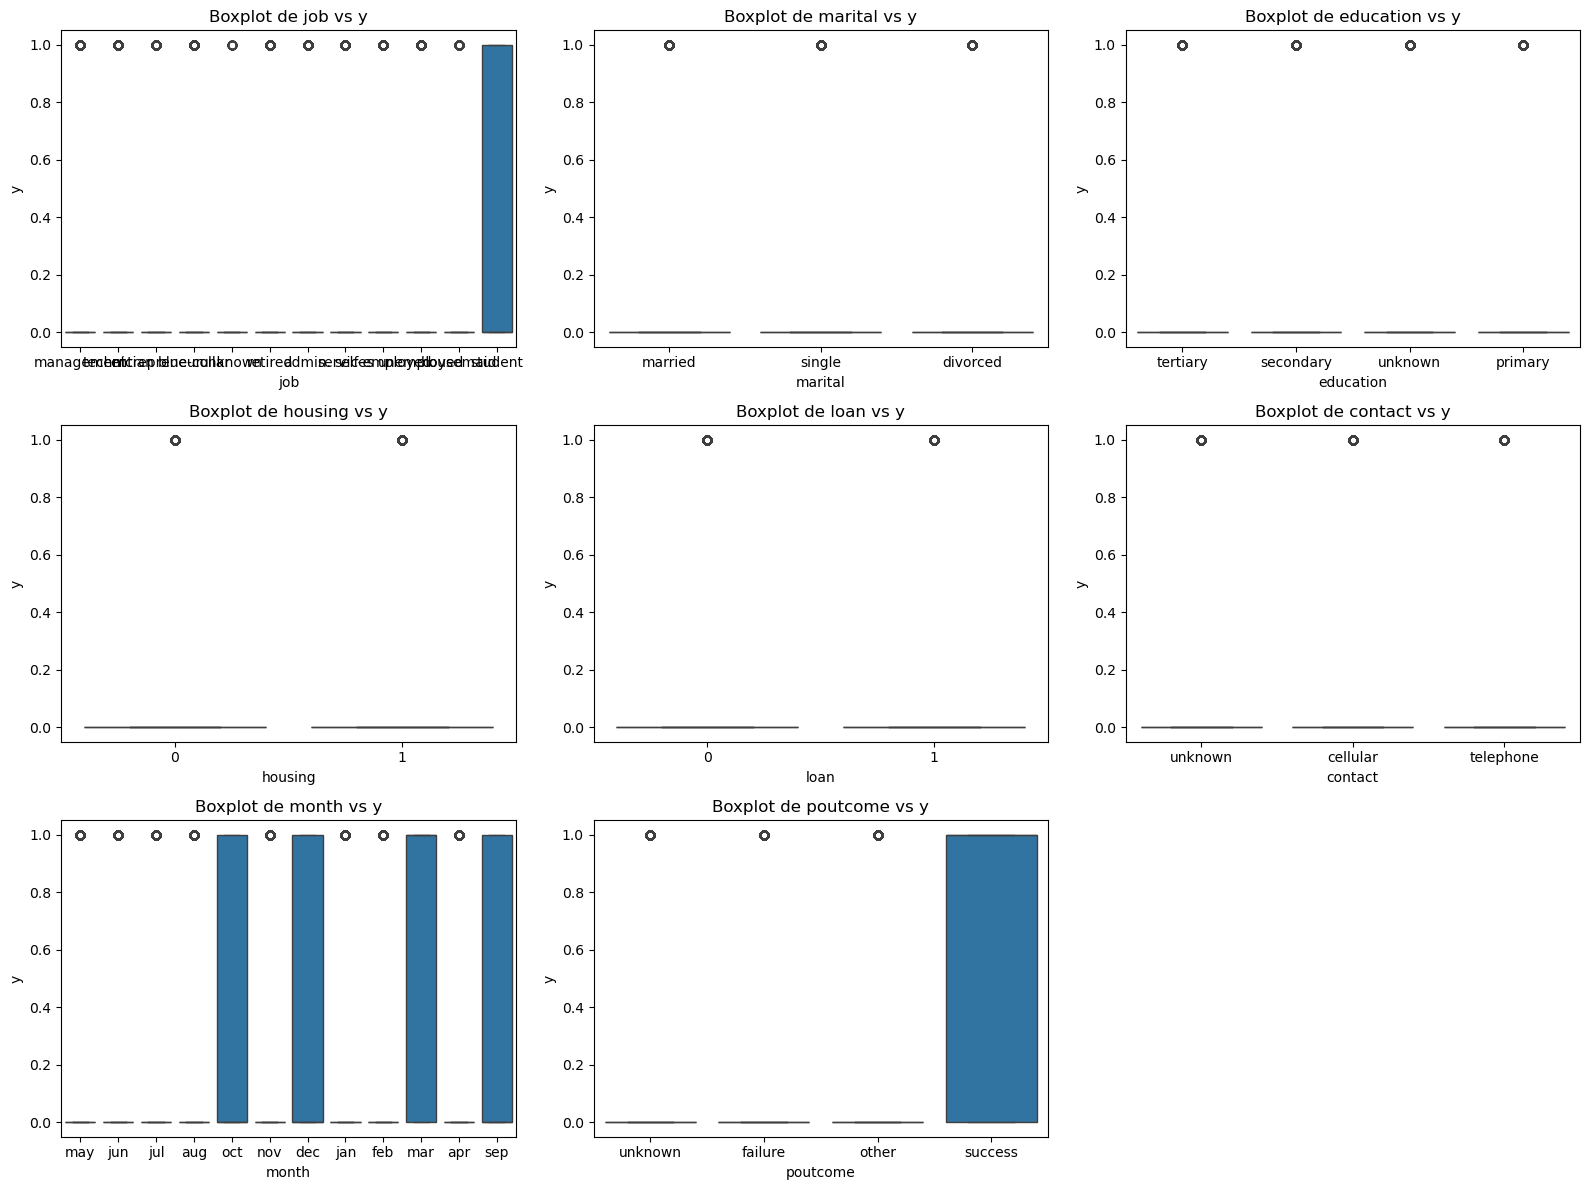

In [42]:
# Boxplots variables categoricas vs y
plt.figure(figsize=(16, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=var, y='y', data=df)
    plt.title(f'Boxplot de {var} vs y')

plt.tight_layout()
plt.show()


No se ve comportamiento extraño

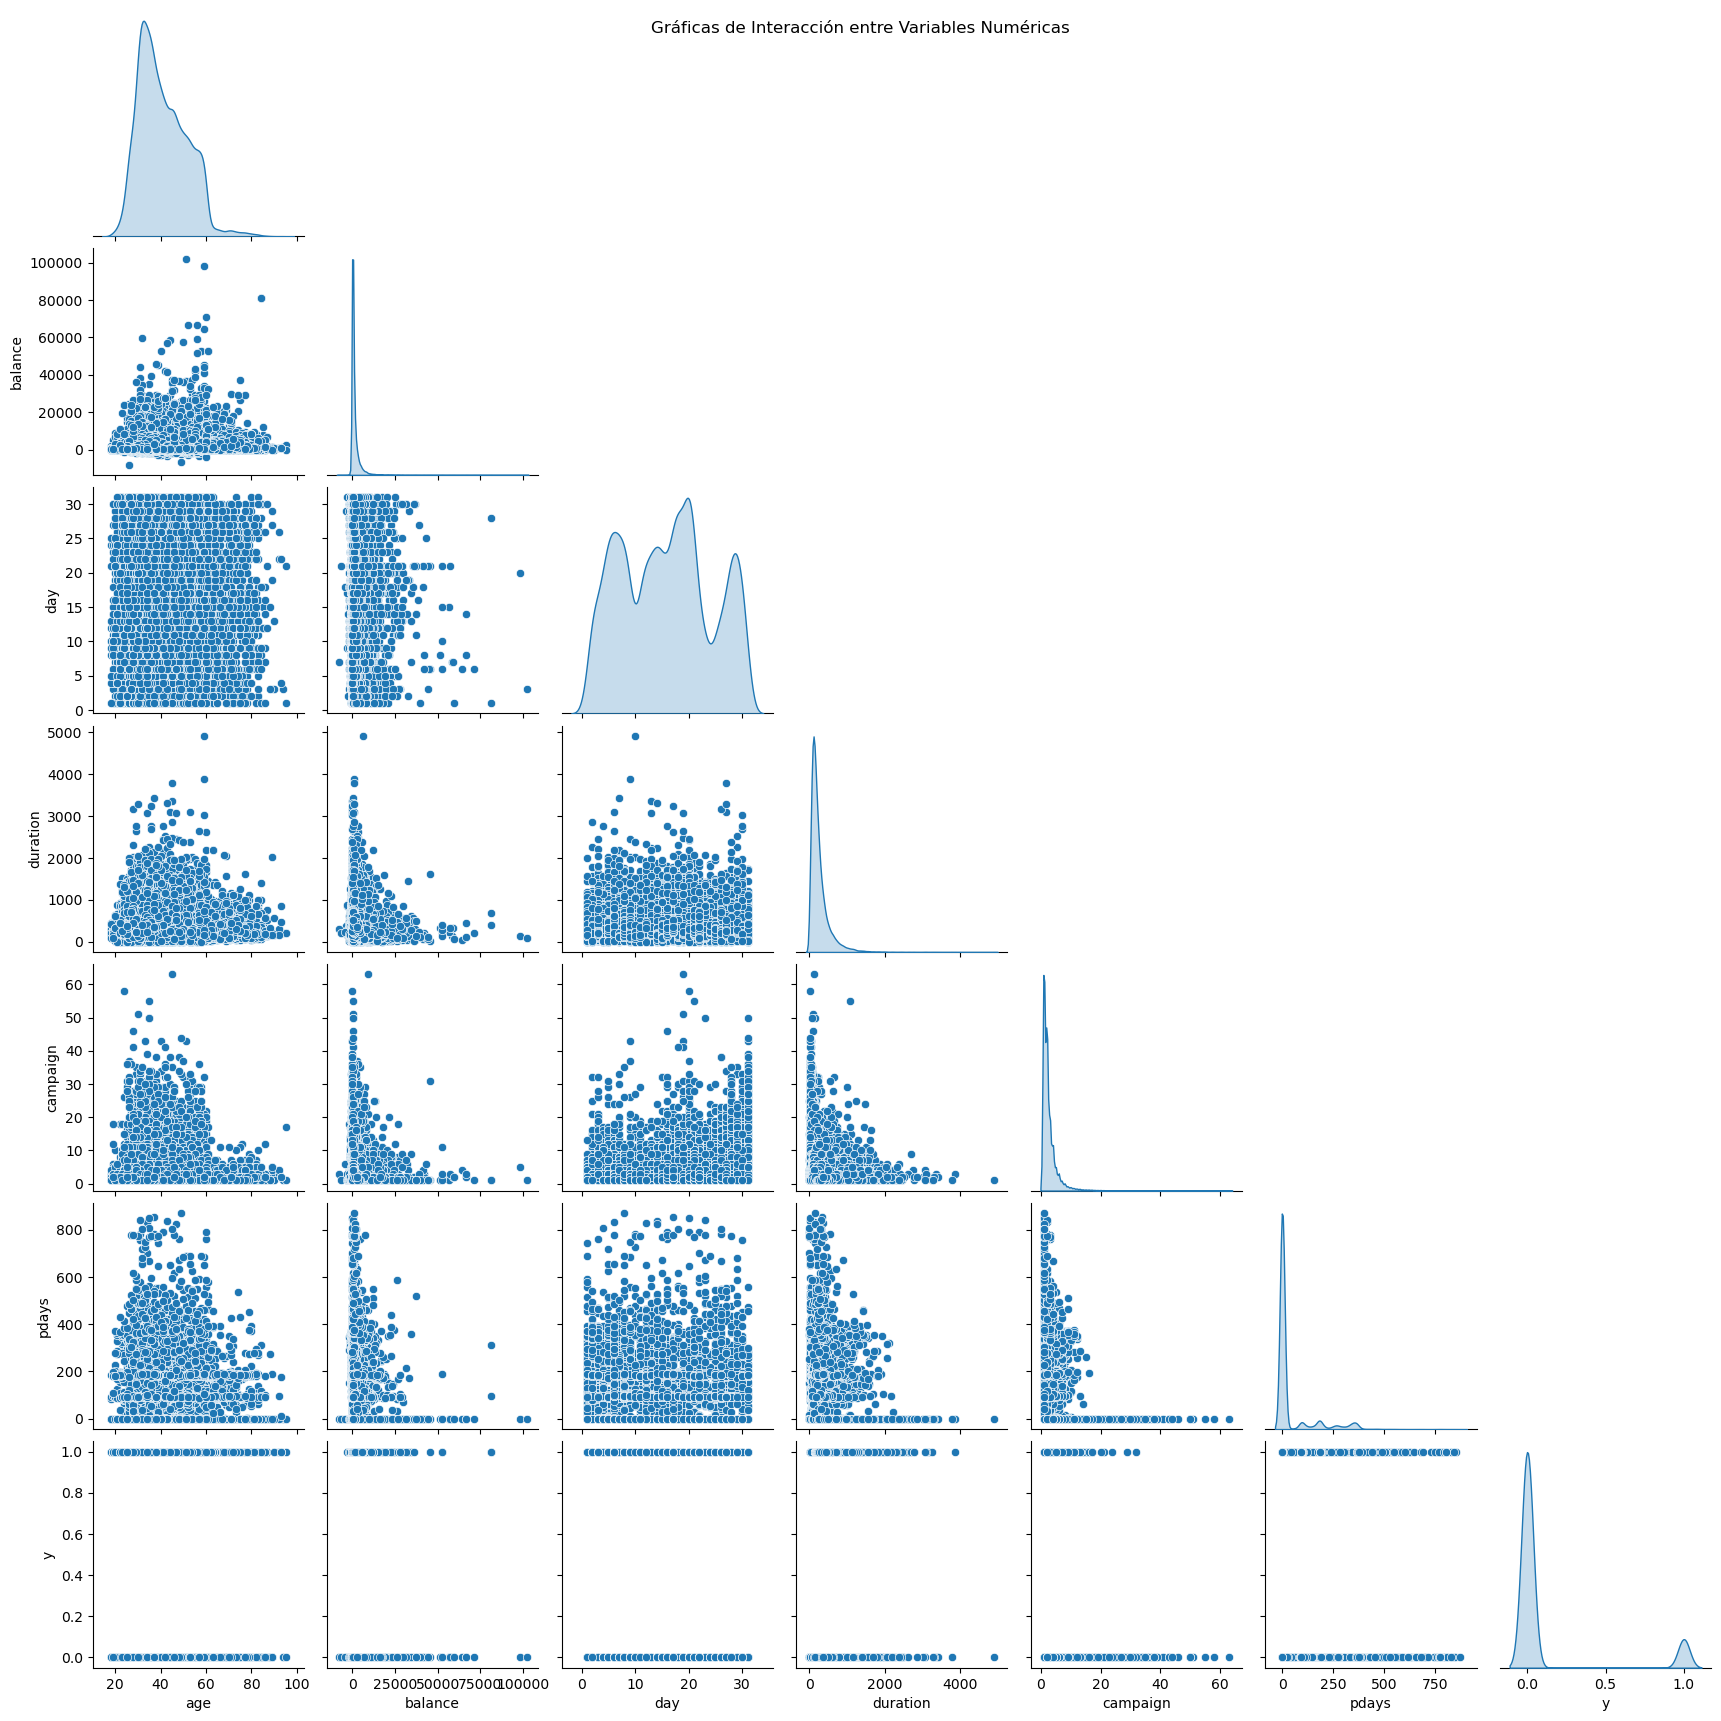

In [24]:
# Gráficas de interacción entre variables numéricas
sns.pairplot(df[numeric_vars], diag_kind='kde', corner=True)
plt.suptitle('Gráficas de Interacción entre Variables Numéricas')
plt.show()


Podemos ver que de los datos historicos se encuentran más clientes que no hayan adquirido un "term deposit". En cuanto a las variables encontramos una disperción de las observaciones aleatoria entre sus rangos.

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


C:\Users\Nicolas\AppData\Local\Temp\ipykernel_7104\74805105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='month', data=df, kind='count', height=5, aspect=1, palette="Set2")


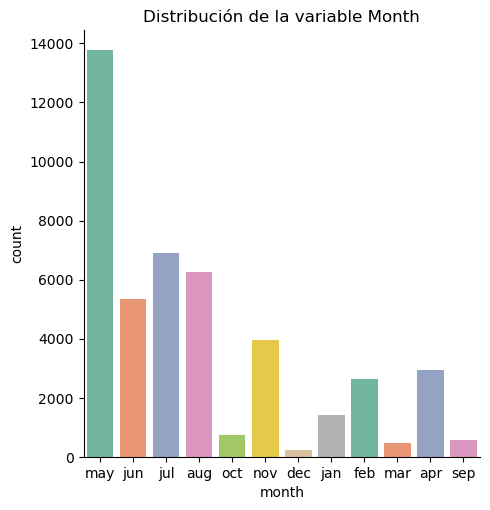

In [32]:
# categorías unicas de la columna 'month'
print(df['month'].value_counts())

# Graficar la distribución de la variable 'month'
sns.catplot(x='month', data=df, kind='count', height=5, aspect=1, palette="Set2")
plt.title('Distribución de la variable Month')
plt.show()
